# Bank Churn and Customer Purchase Prediction

## Import Libraries

In [139]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt

## Import Libraries 2

In [140]:
#  pip install imlearn

In [141]:
# pip install adasyn

In [142]:
import imblearn
import sklearn

In [143]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## Read CSV

In [144]:
df=pd.read_csv('C:/Users/agaly/OneDrive/Desktop/ybi foundation/Business Analytics/Churn_Modelling.csv')

In [145]:
# Displaying the first 5 Columns

In [146]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Checking if there is any empty values in the dataset

In [147]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Displaying the Statistical values of the dataset

In [148]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

## Displaying the information about the dataset features

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Duplicating the DF (if u use it multiple times it may crash the data)

In [150]:
df2 = df

## Displaying the Count of each rows in a column - OR frequency of the values in the features of the dataset


In [151]:
for col in df2.columns:
    print(f"The Count of Each Column '{col}' :")
    print(df2[col].value_counts())
    print()

The Count of Each Column 'RowNumber' :
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

The Count of Each Column 'CustomerId' :
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

The Count of Each Column 'Surname' :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

The Count of Each Column 'CreditScore' :
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

The Count of Each Column 'Geography' :
Geography
France     5014
Germany    

Distributional characteristics refer to the properties and patterns that describe how data points are spread or distributed across different values in a dataset. Understanding these characteristics is crucial in data analysis and modeling. Here are key distributional characteristics:

#### Central Tendency:
Measures where the center of the data distribution lies.
Common measures include mean, median, and mode.
Helps to understand typical or average values in the dataset.

#### Dispersion or Spread:
Indicates how spread out the data points are from the central tendency.
Measures include variance, standard deviation, range, and interquartile range (IQR).
Provides insights into the variability of data points.

#### Shape:
Describes the form of the distribution curve of the data.
Common shapes include normal (bell-shaped), skewed (asymmetric), uniform (constant), and bimodal (two peaks).
Shape influences how data points cluster around the central tendency.

#### Symmetry and Skewness:
Symmetry refers to whether the distribution is balanced around its center.
Skewness measures the asymmetry of the distribution.
Positive skewness: More data points are on the left (lower values) with a tail on the right (higher values).
Negative skewness: More data points are on the right (higher values) with a tail on the left (lower values).

#### Example:
For instance, in a dataset of customer transaction amounts:
Central Tendency: The mean transaction amount might be $100.
Dispersion: Standard deviation could be $50, indicating variability around the mean.
Shape: Histogram shows a right-skewed distribution with most transactions below $100.
Kurtosis: If kurtosis is high, it suggests a sharper peak around the mean transaction amount.

# EDA

## Univariate Analysis

### Plotting Distribution of numerical features

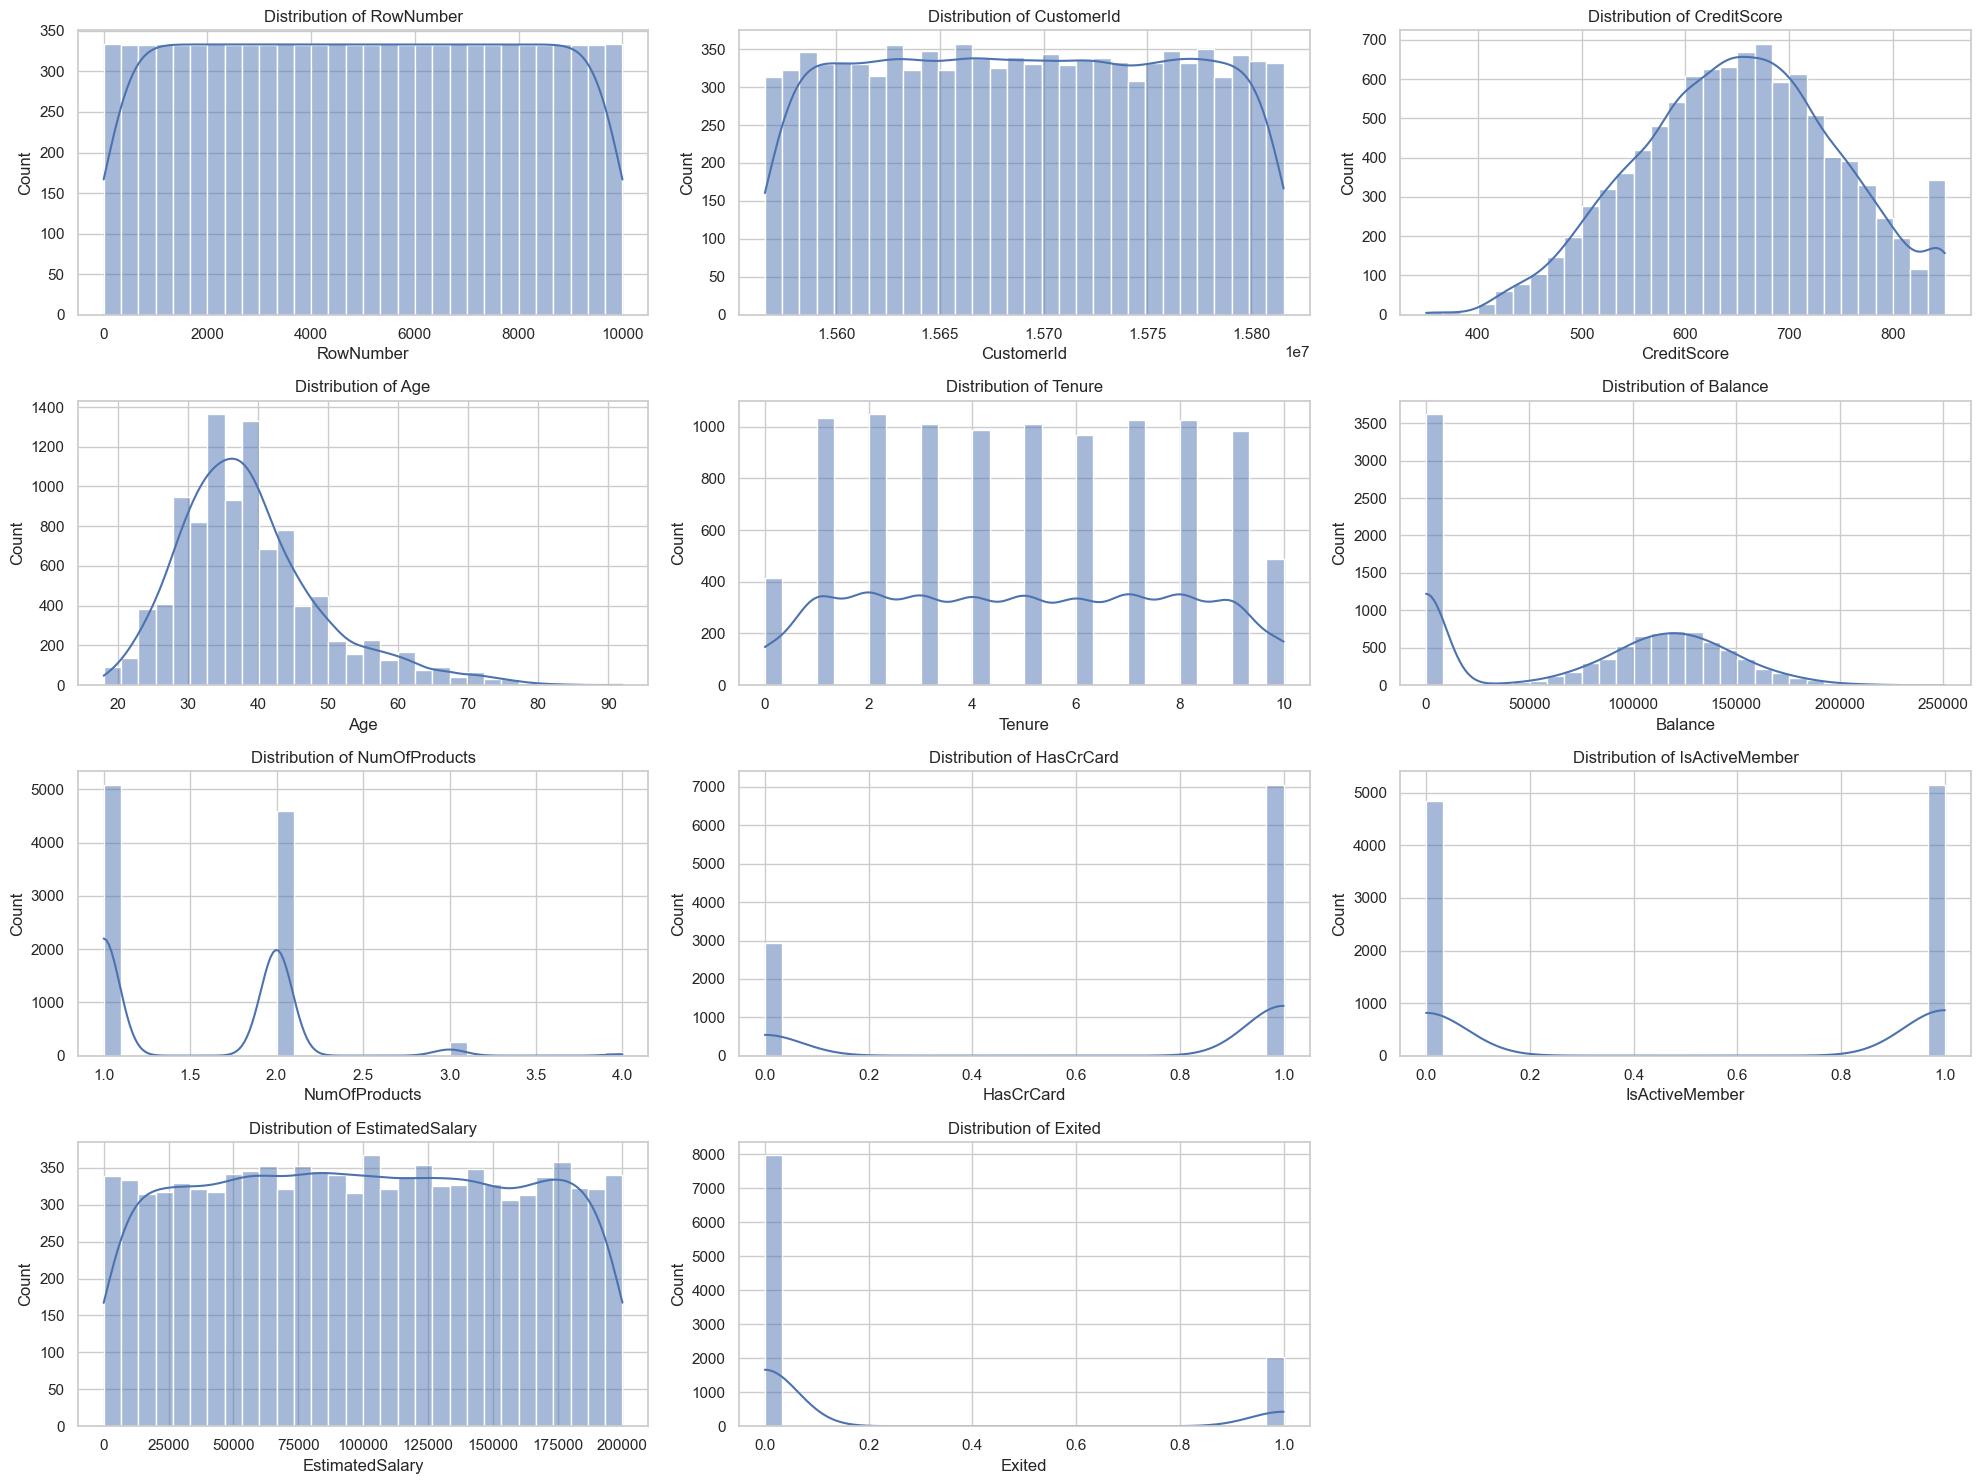

In [152]:
numerical_col=df2.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_col,1):
    plt.subplot(4,3,i)
    sn.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
    
    
    
    


### Plotting value counts of categorical columns

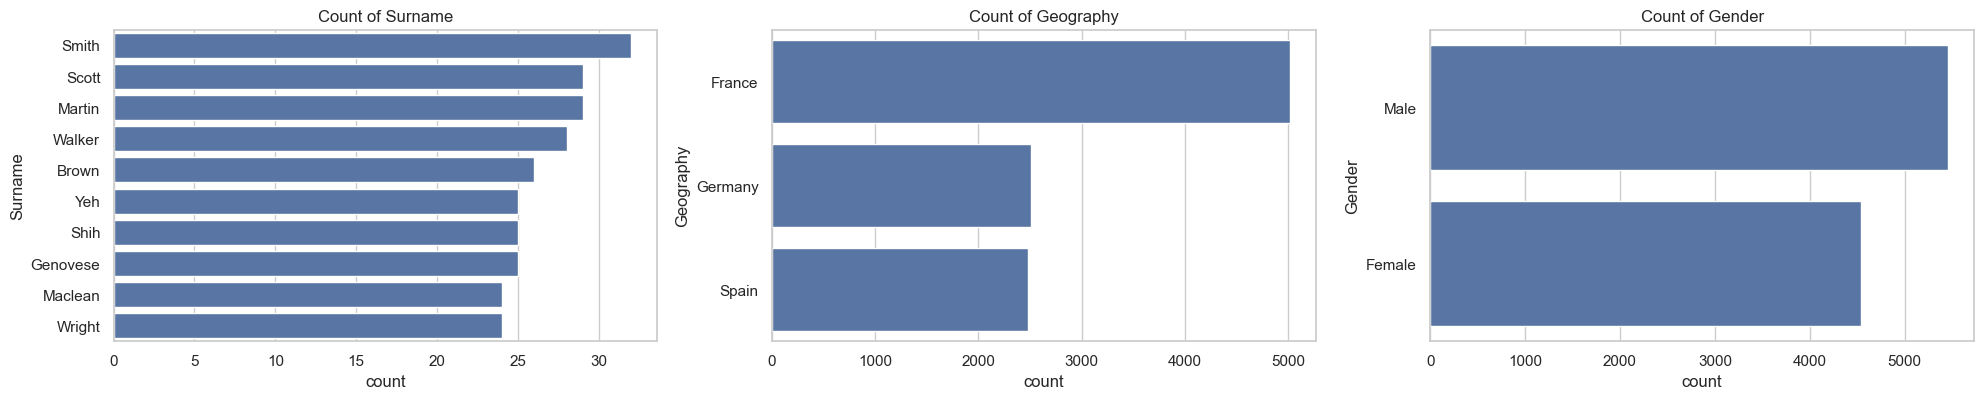

In [153]:
cate_col= df2.select_dtypes(include=['object','category']).columns
plt.figure(figsize=(20,15))
for i,col in enumerate(cate_col,1):
    plt.subplot(4,3,i)
    top_10_lar=df2[col].value_counts().nlargest(10).index
    sn.countplot(y=df2[col], order= top_10_lar)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical columns against target variable

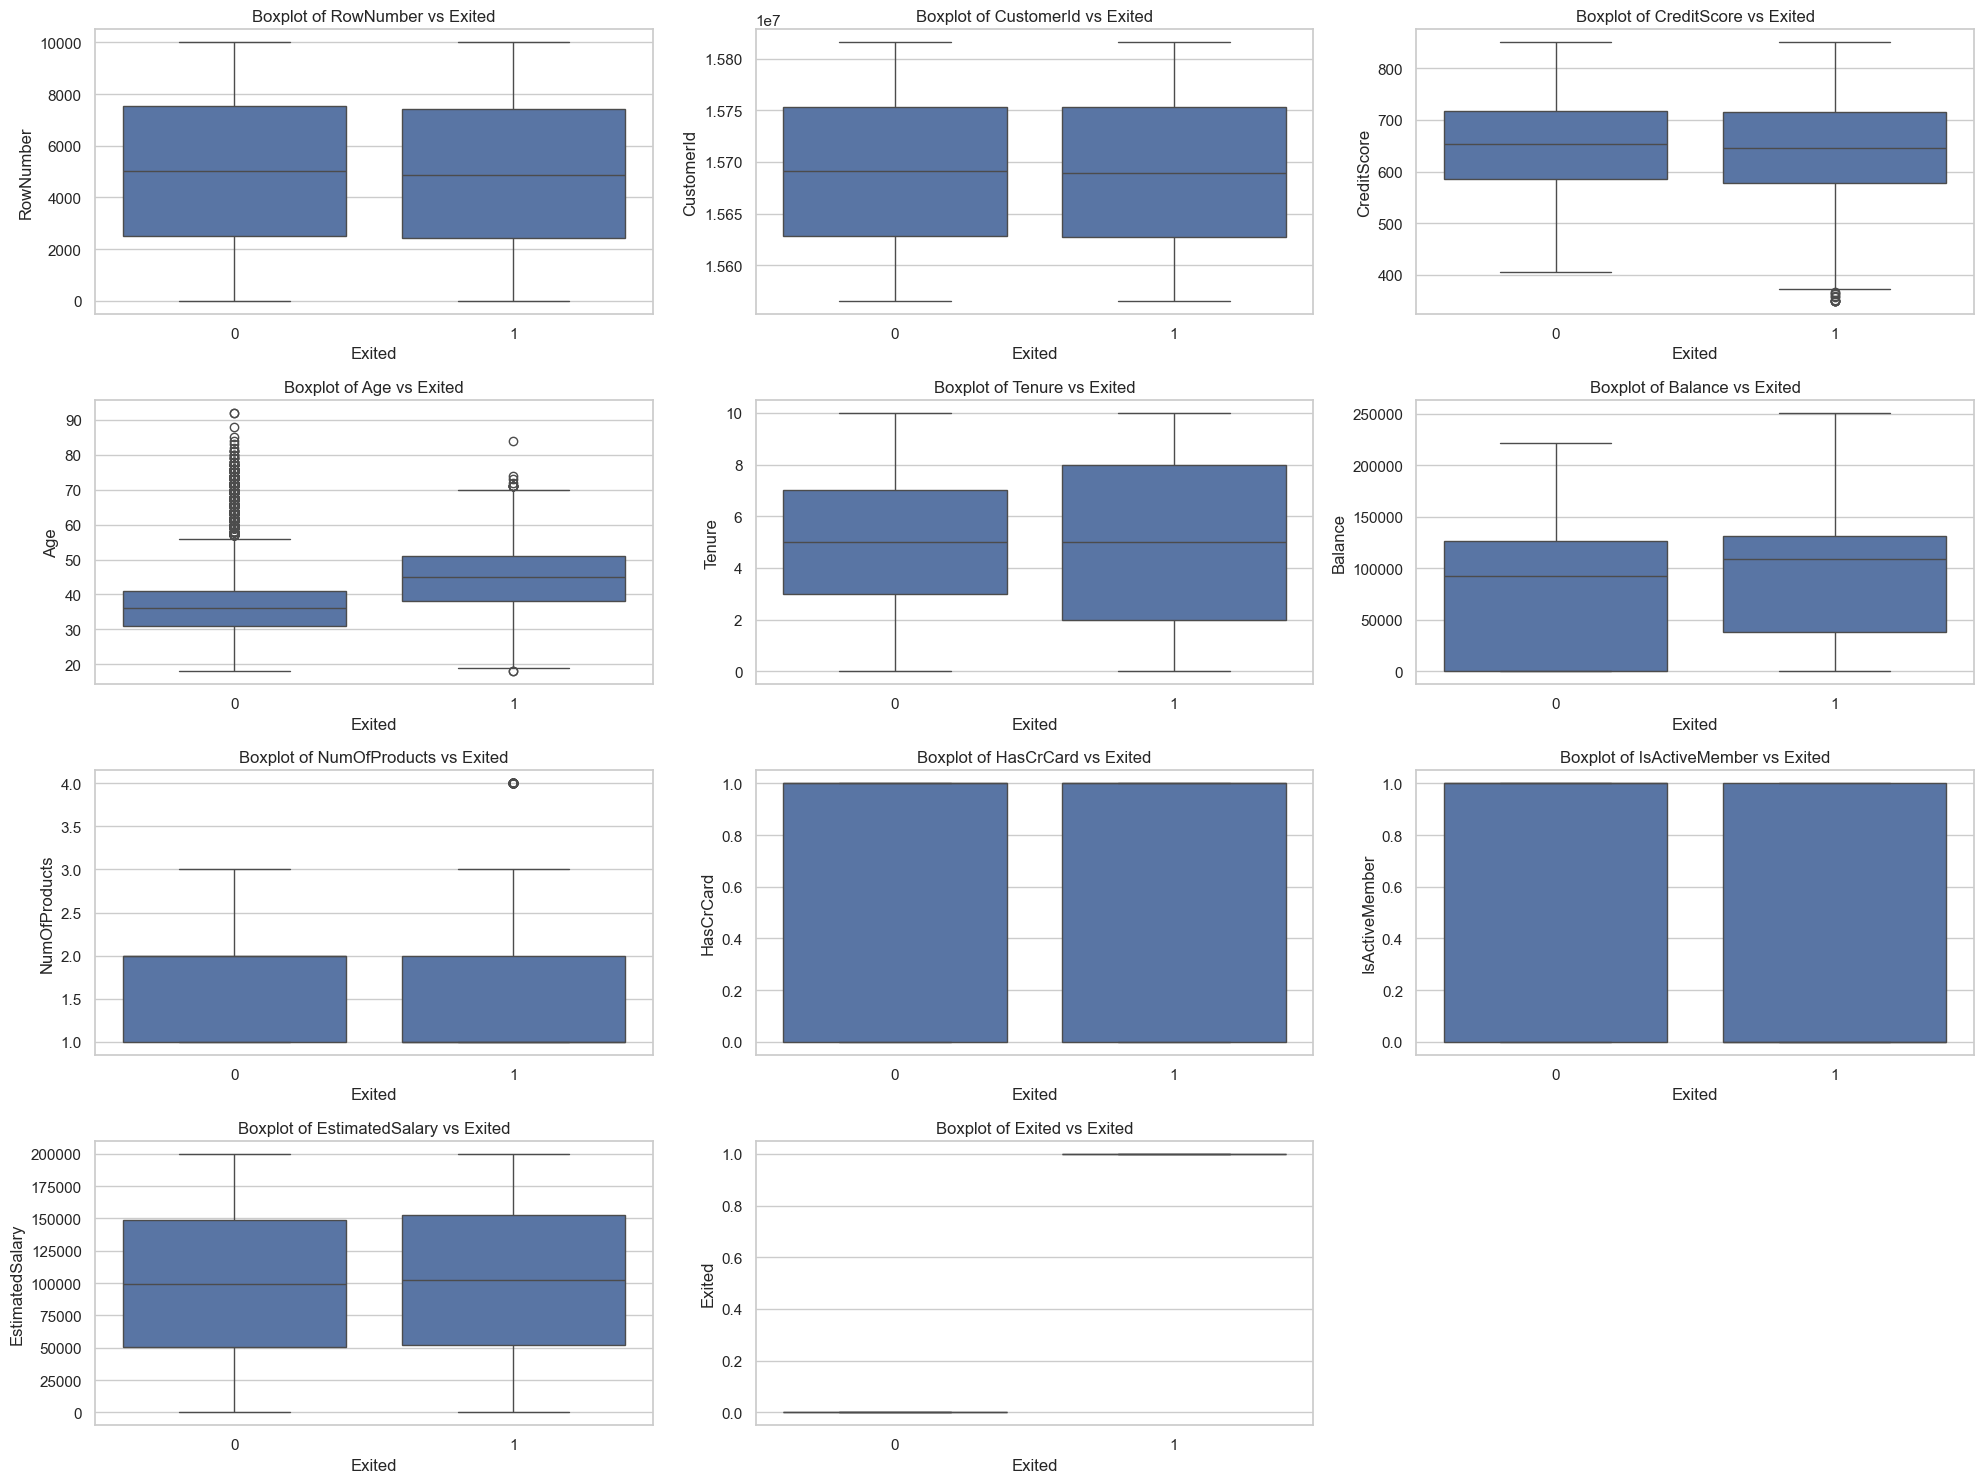

In [154]:
target = 'Exited'
plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_col,1):
    plt.subplot(4,3,i)
    sn.boxplot(x=target, y=col, data=df2 )
    plt.title(f'Boxplot of {col} vs {target}')
plt.tight_layout()
plt.show()

### Categorical columns against target variable

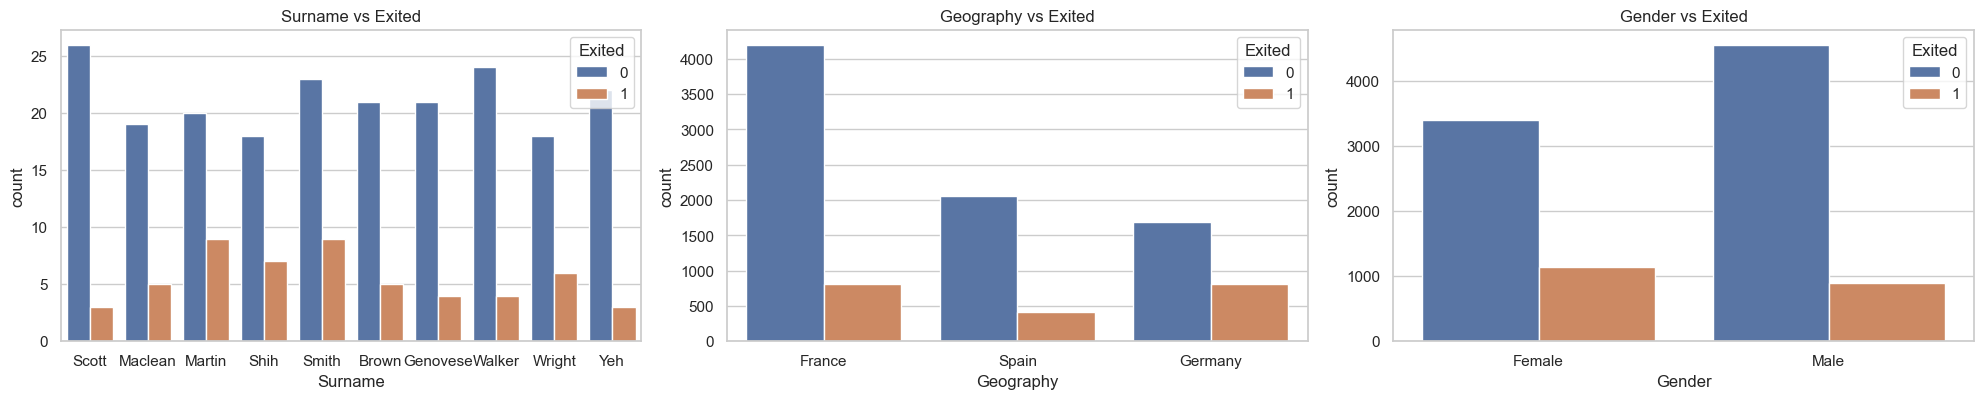

In [155]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(cate_col, 1):
    plt.subplot(4, 3, i)
    top_10_values = df2[col].value_counts().nlargest(10).index
    sn.countplot(x=col, hue=target, data=df2[df2[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Pairplot for numerical columns

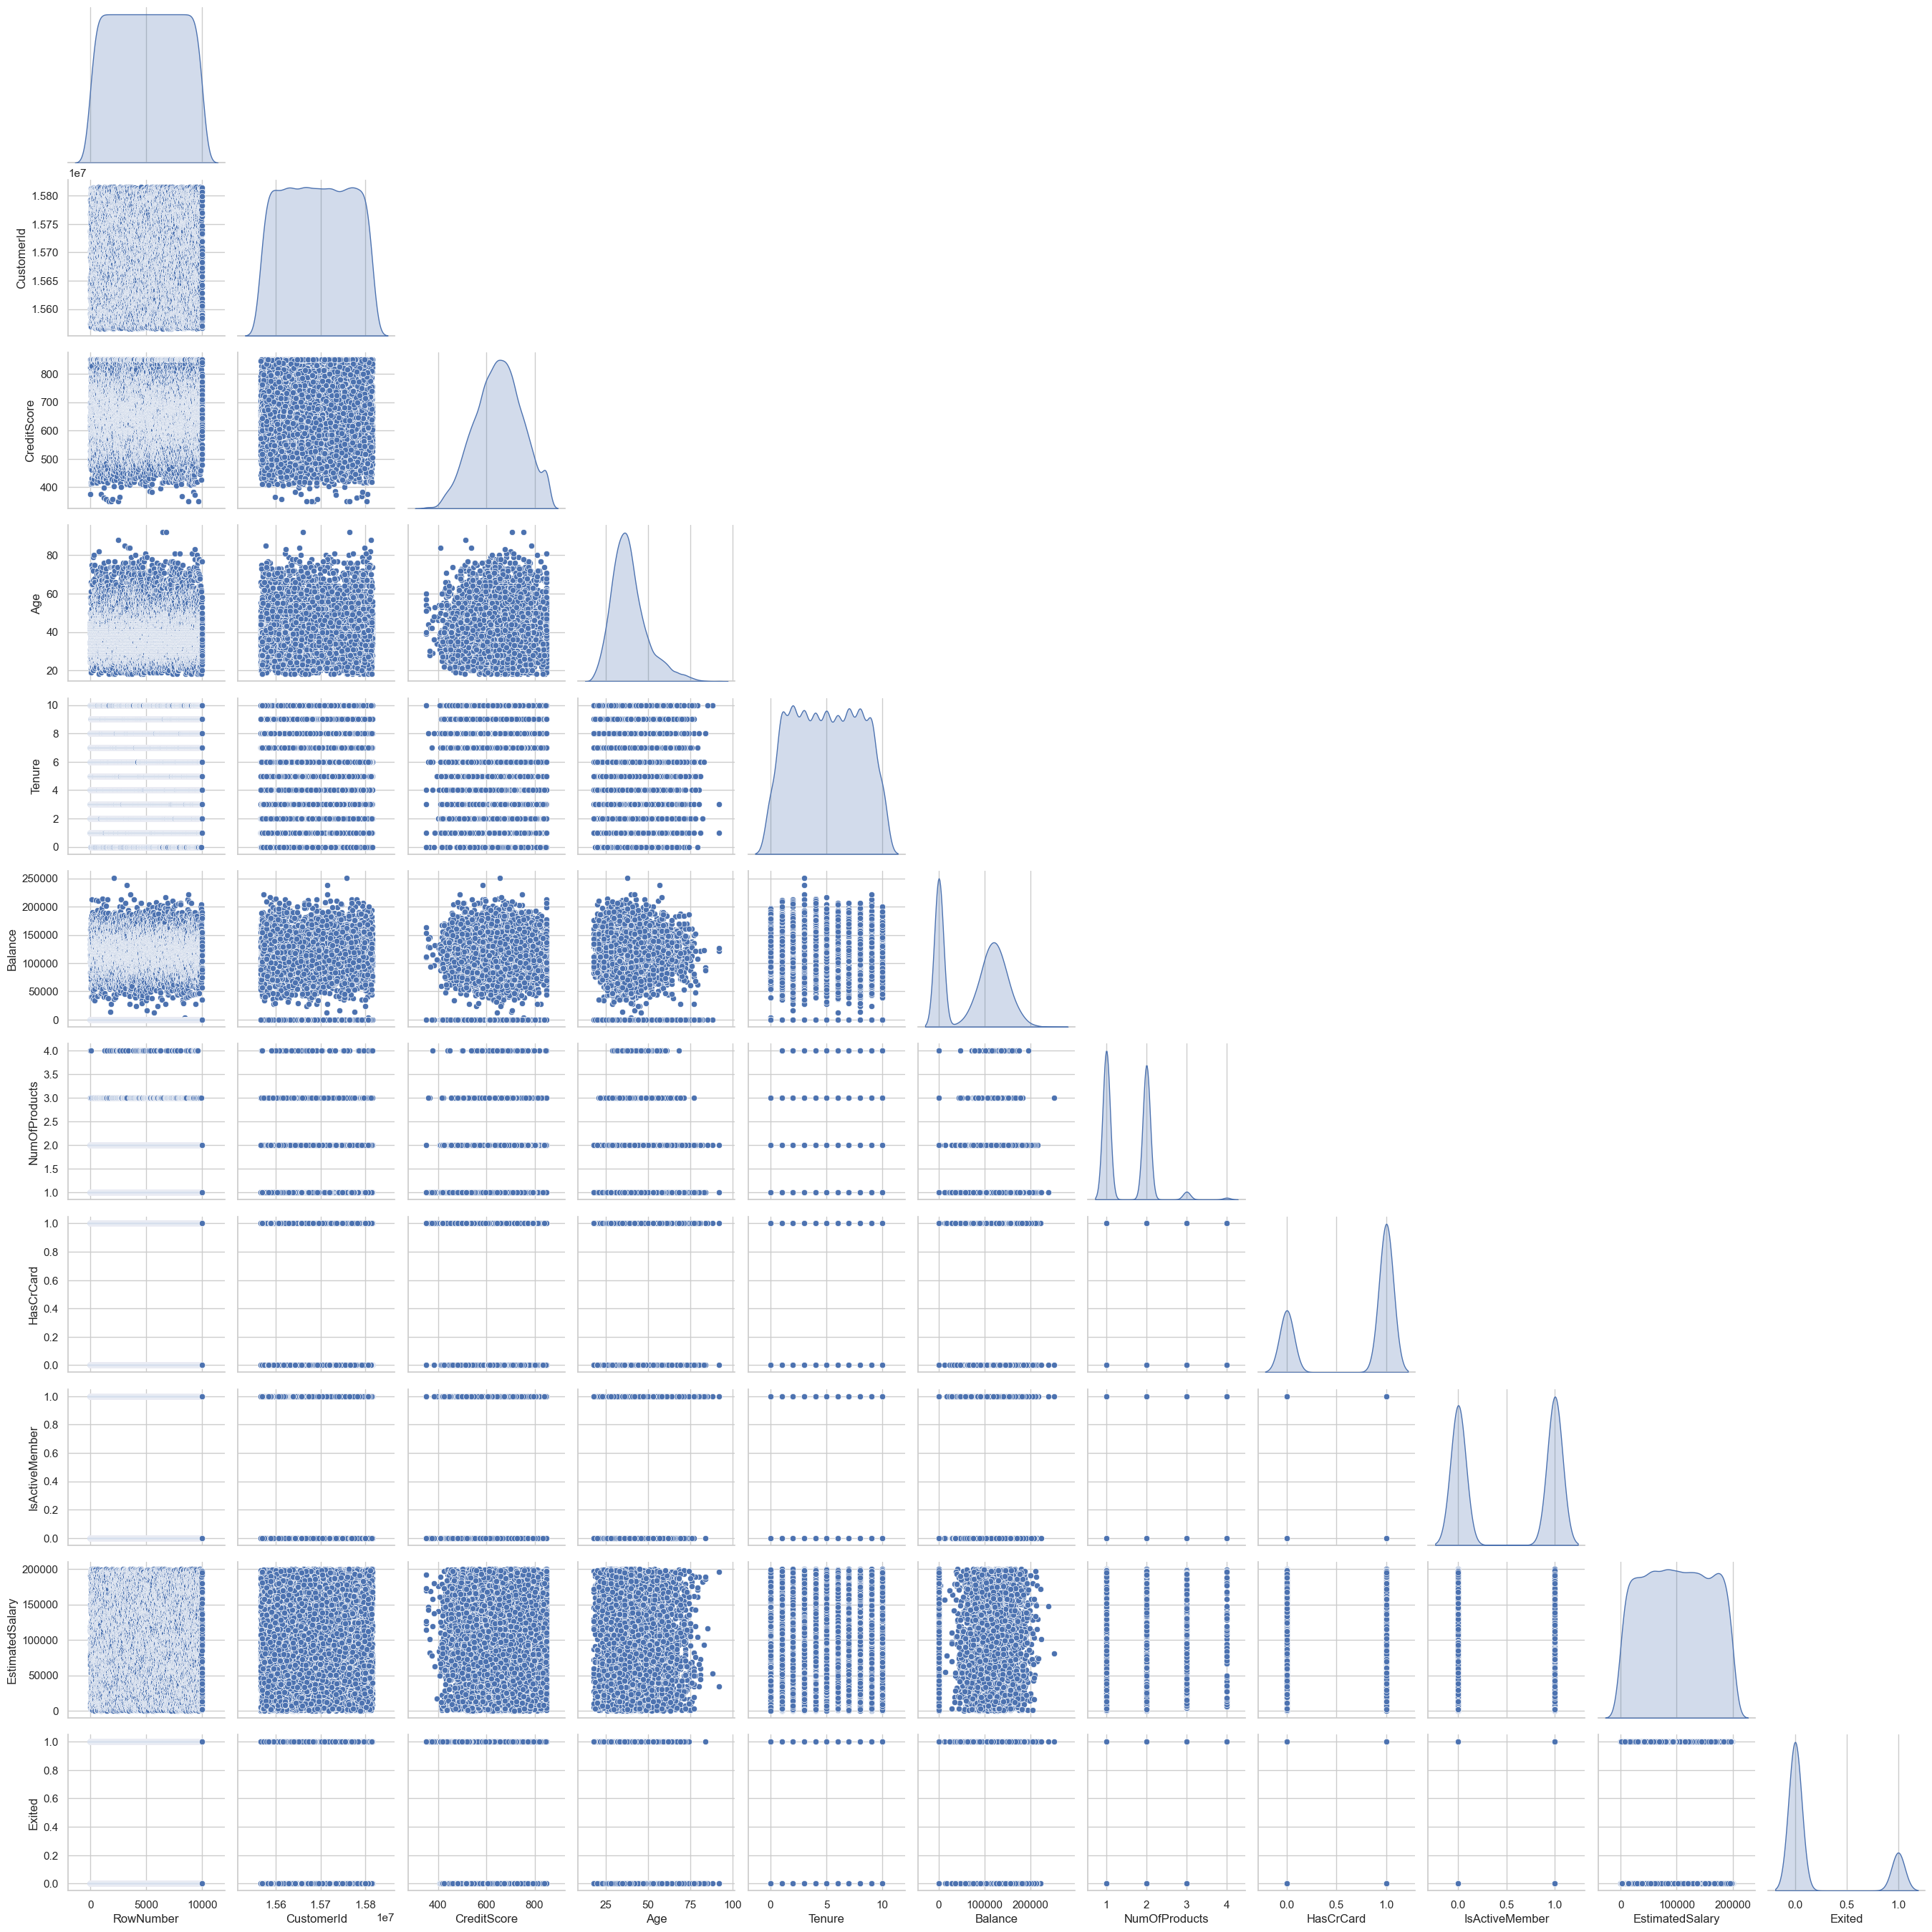

In [156]:
sn.pairplot(df[numerical_col], diag_kind='kde', corner=True)
plt.show()

### Scatter plots for some combinations of numerical variables 

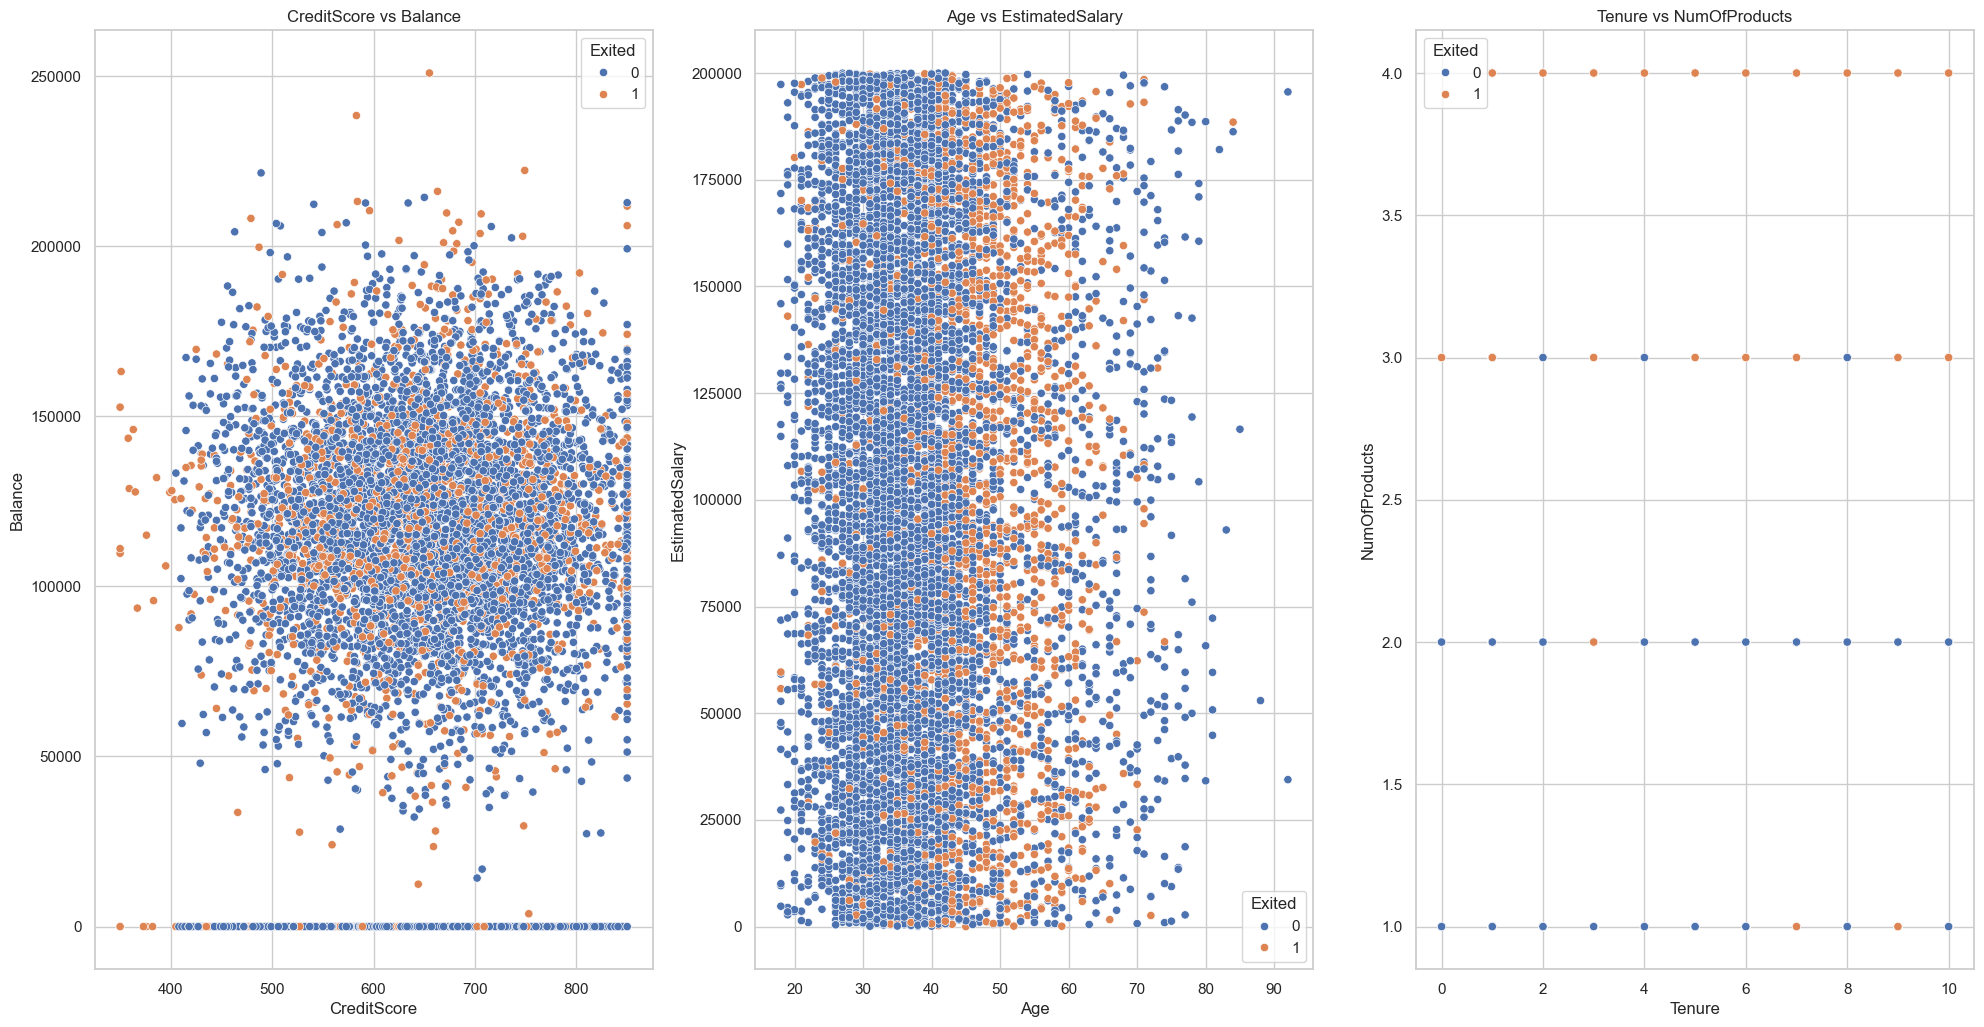

In [157]:
plt.figure(figsize=(20, 20))
pairs = [('CreditScore', 'Balance'), ('Age', 'EstimatedSalary'), ('Tenure', 'NumOfProducts')]
for i, (col1, col2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sn.scatterplot(x=col1, y=col2, hue=target, data=df2)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

## Correlation Insights

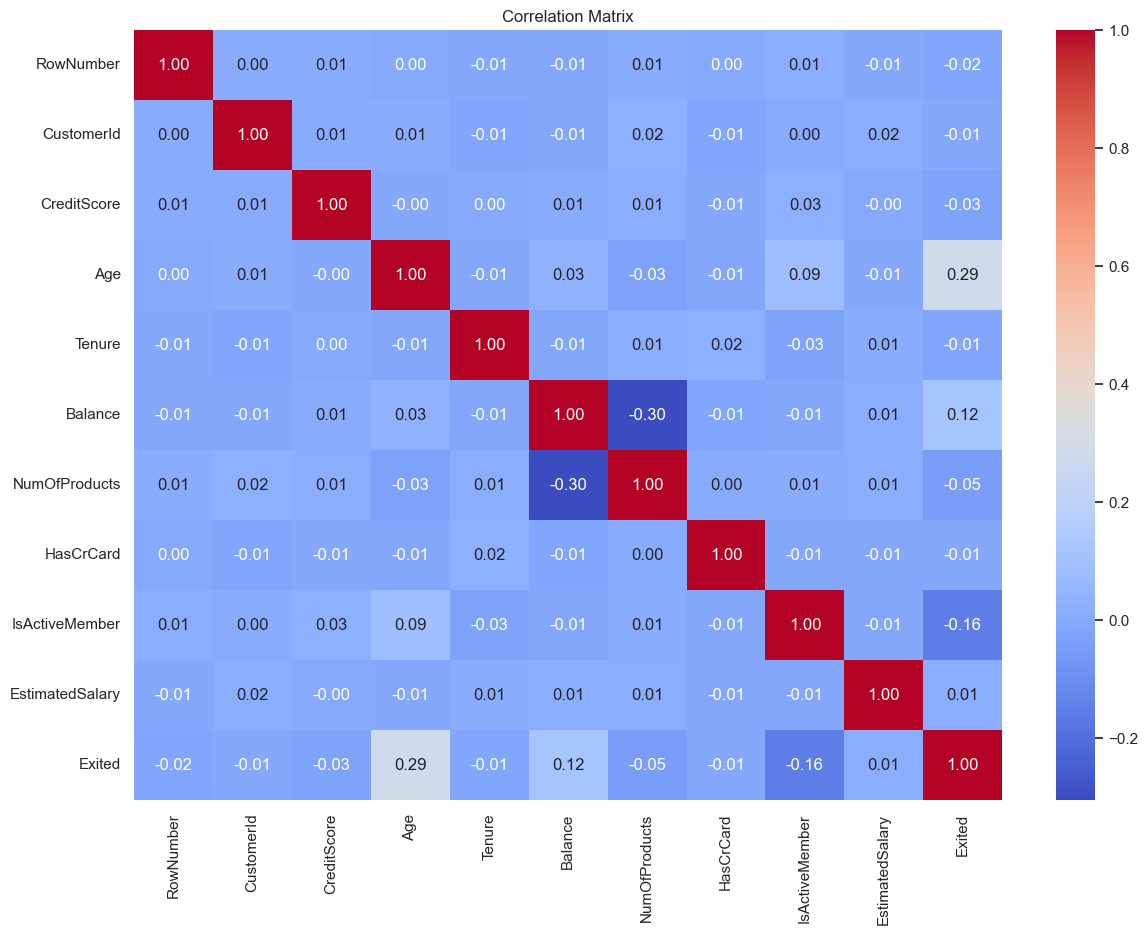

In [158]:
numeric_data = df2.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Trend Observation

C:\Users\agaly\AppData\Local\Temp\ipykernel_11984\1242345360.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df2.groupby('AgeGroup')['Exited'].mean().reset_index()


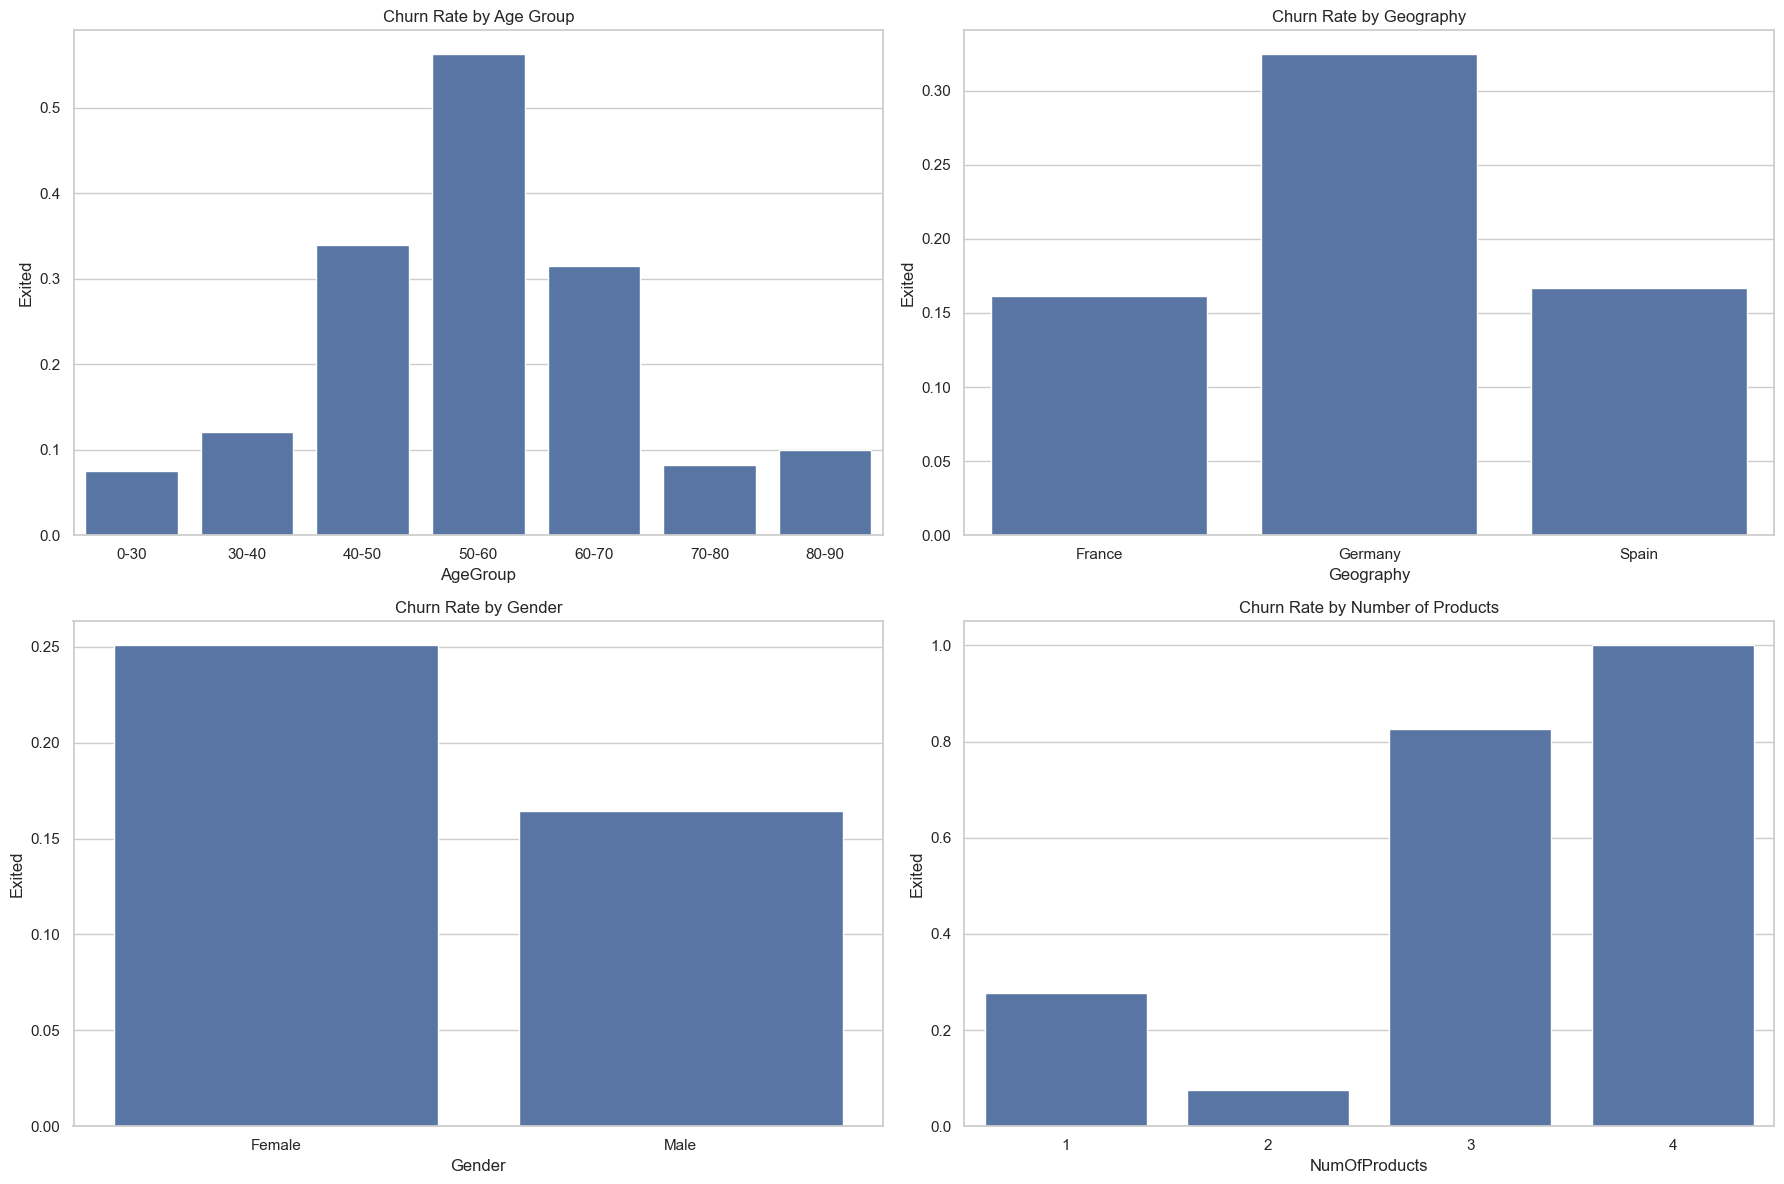

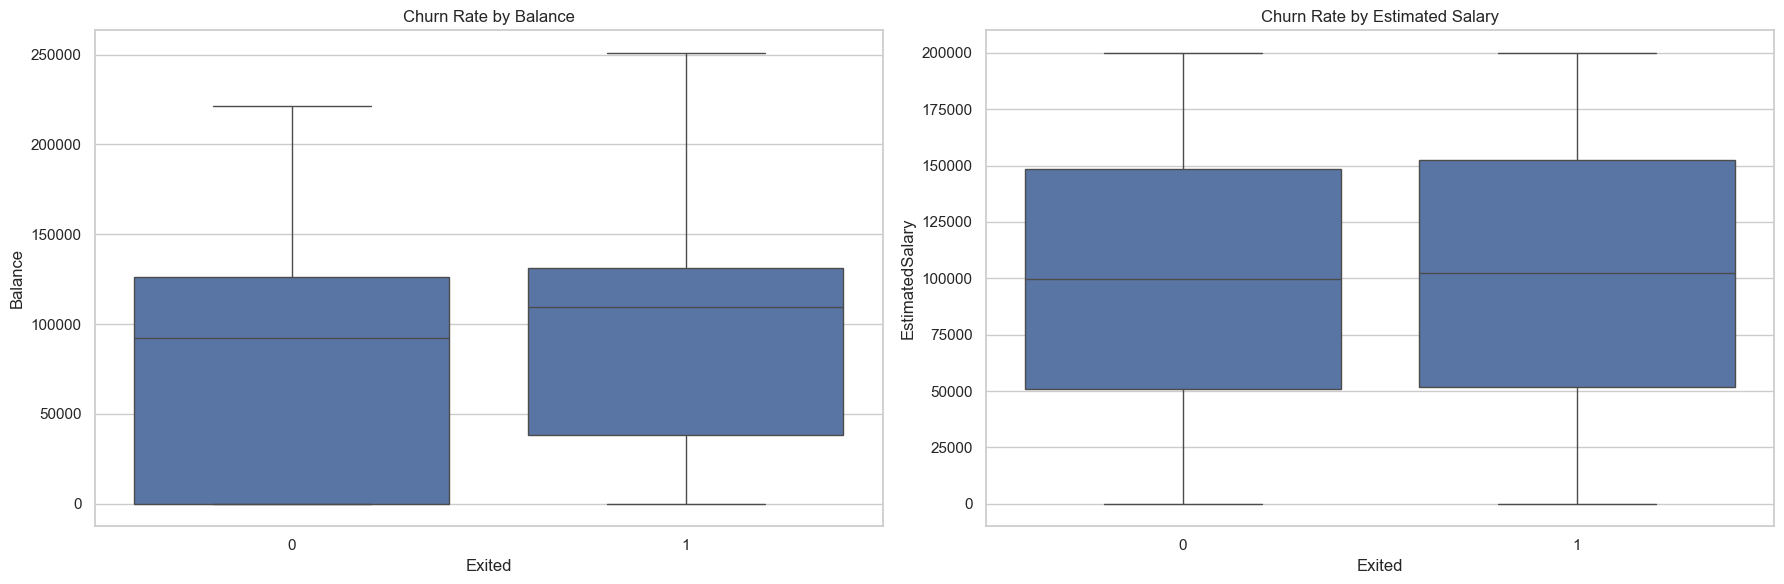

In [159]:
df2['AgeGroup'] = pd.cut(df2['Age'], bins=[0,30,40,50,60,70,80,90], labels=['0-30','30-40','40-50','50-60','60-70','70-80','80-90'])

churn_by_age_group = df2.groupby('AgeGroup')['Exited'].mean().reset_index()
churn_by_geography = df2.groupby('Geography')['Exited'].mean().reset_index()
churn_by_gender = df2.groupby('Gender')['Exited'].mean().reset_index()
churn_by_products = df2.groupby('NumOfProducts')['Exited'].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sn.barplot(data=churn_by_age_group, x='AgeGroup', y='Exited', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Age Group')

sn.barplot(data=churn_by_geography, x='Geography', y='Exited', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Geography')

sn.barplot(data=churn_by_gender, x='Gender', y='Exited', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Gender')

sn.barplot(data=churn_by_products, x='NumOfProducts', y='Exited', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Number of Products')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sn.boxplot(data=df2, x='Exited', y='Balance', ax=axes[0])
axes[0].set_title('Churn Rate by Balance')

sn.boxplot(data=df2, x='Exited', y='EstimatedSalary', ax=axes[1])
axes[1].set_title('Churn Rate by Estimated Salary')

plt.tight_layout()
plt.show()


## Outlier Management

### Finding which columns has outliers

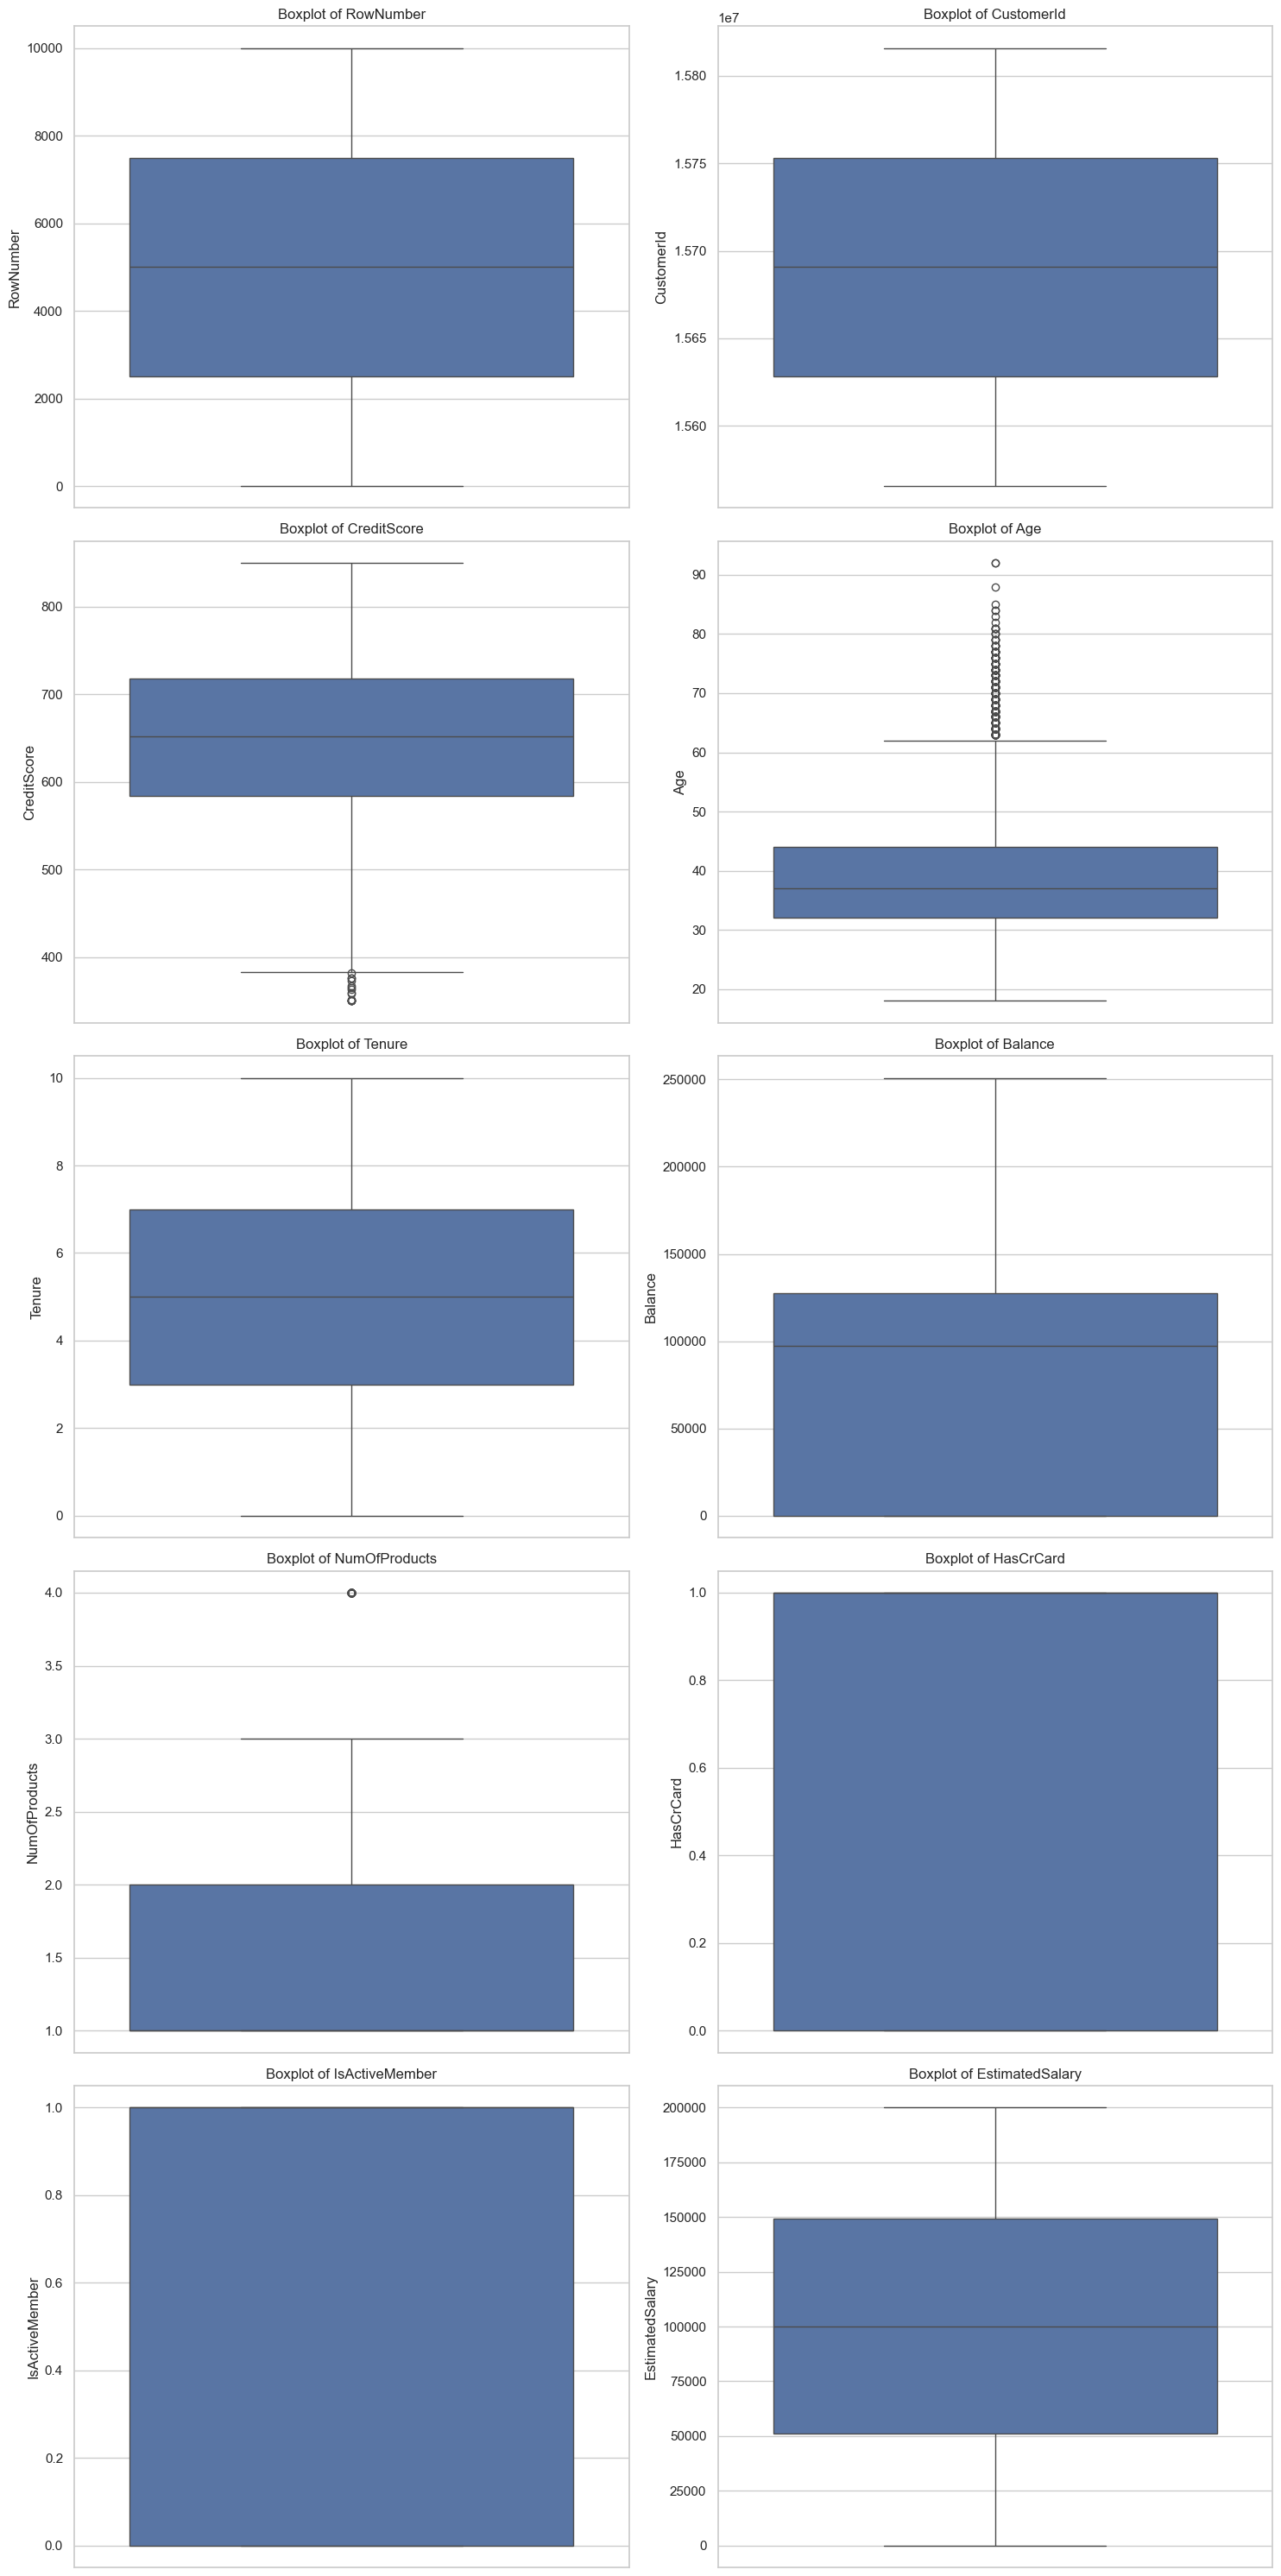

In [160]:
sn.set_theme(style="whitegrid")

numeric_col = df2.select_dtypes(include=['float64', 'int64']).columns
numeric_col = numeric_col.drop('Exited')

fig, axes = plt.subplots(nrows=(len(numeric_col) + 1) // 2, ncols=2, figsize=(15, len(numeric_col) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_col):
    sn.boxplot(data=df2, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Handling Outliers by Capping it with IQR Method

In [161]:
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

numeric_col = df2.select_dtypes(include=['float64', 'int64']).columns
numeric_col = np.delete(numeric_col, np.where(numeric_col == 'Exited'))

outlier_columns = []
for col in numeric_col:
    capped_column = cap_outliers_iqr(df2[col])
    if not capped_column.equals(df2[col]):
        outlier_columns.append(col)
    df2[col] = capped_column

### Checking Columns after Handling Outliers

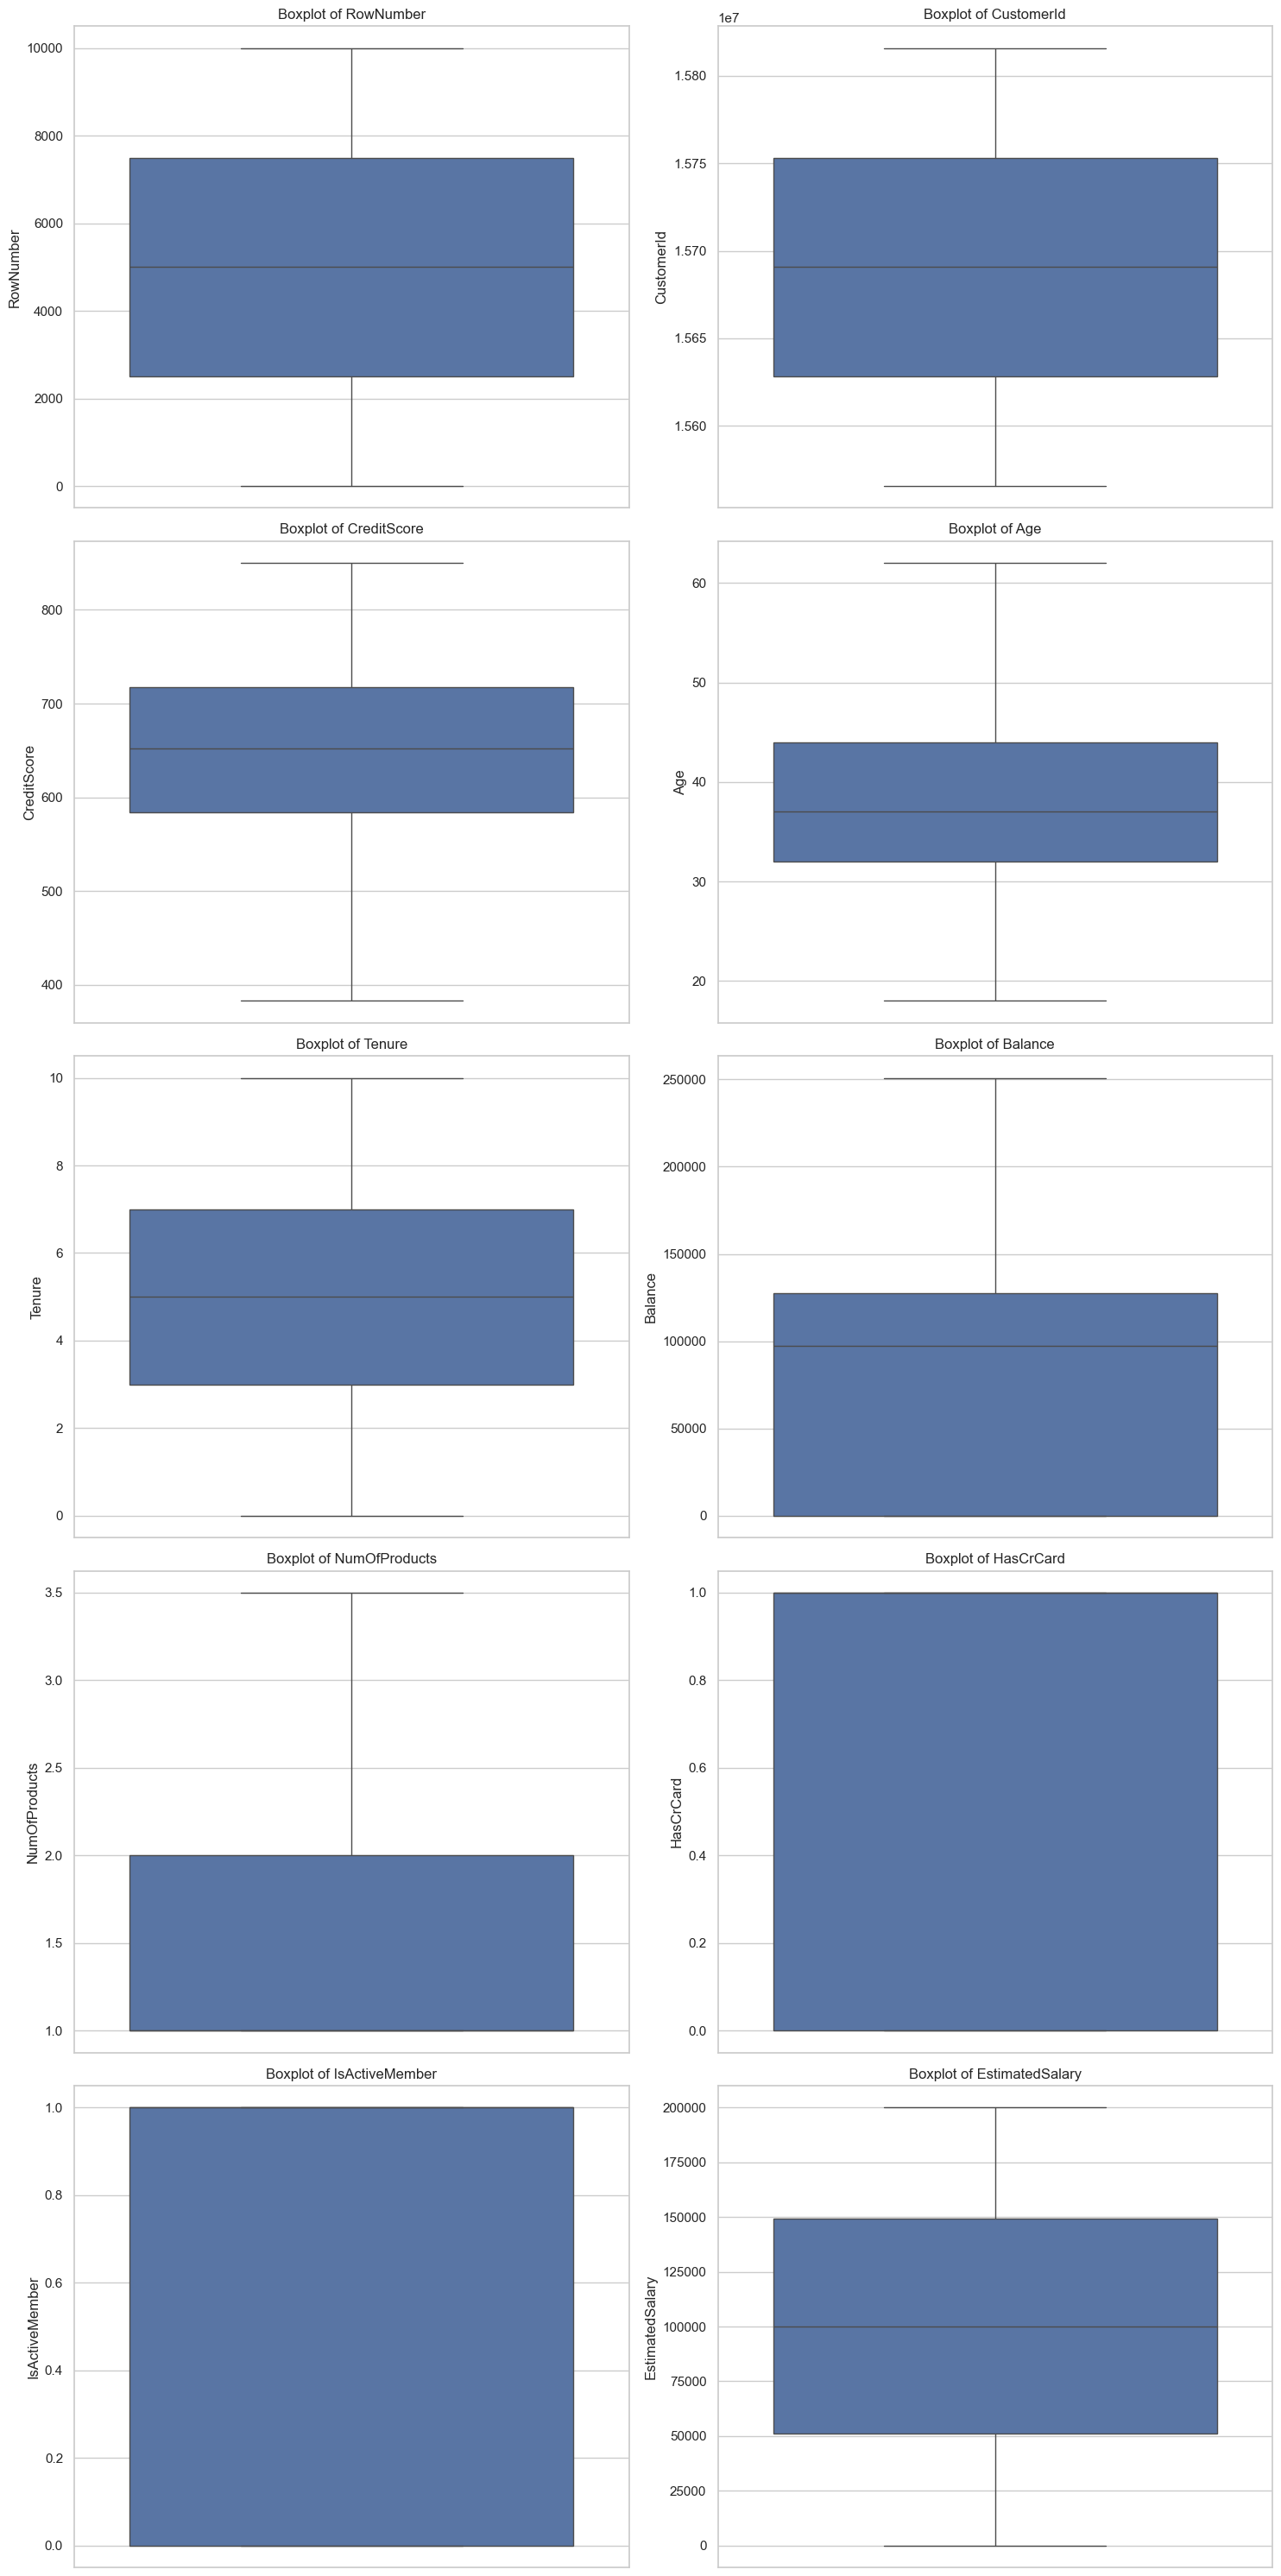

In [162]:
sn.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=(len(numeric_col) + 1) // 2, ncols=2, figsize=(15, len(numeric_col) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_col):
    sn.boxplot(data=df2, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [163]:
df2.drop(columns=['Surname','RowNumber','CustomerId','Balance'], inplace=True)
df2.head()

CreditScore Geography  Gender   Age  Tenure  NumOfProducts  HasCrCard  \
0        619.0    France  Female  42.0       2            1.0          1   
1        608.0     Spain  Female  41.0       1            1.0          0   
2        502.0    France  Female  42.0       8            3.0          1   
3        699.0    France  Female  39.0       1            2.0          0   
4        850.0     Spain  Female  43.0       2            1.0          1   

   IsActiveMember  EstimatedSalary  Exited AgeGroup  
0               1        101348.88       1    40-50  
1               1        112542.58       0    40-50  
2               0        113931.57       1    40-50  
3               0         93826.63       0    30-40  
4               1         79084.10       0    40-50

In [164]:
df2.shape

(10000, 11)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['Exited']), df2['Exited'],test_size=0.2,random_state=42)

In [166]:
X_train.head()

CreditScore Geography  Gender   Age  Tenure  NumOfProducts  HasCrCard  \
9254        686.0    France    Male  32.0       6            2.0          1   
1561        632.0   Germany    Male  42.0       4            2.0          1   
1670        559.0     Spain    Male  24.0       3            1.0          1   
6087        561.0    France  Female  27.0       9            1.0          1   
6669        517.0    France    Male  56.0       9            1.0          0   

      IsActiveMember  EstimatedSalary AgeGroup  
9254               1        179093.26    30-40  
1561               1        195978.86    40-50  
1670               0         85891.02     0-30  
6087               0        153080.40     0-30  
6669               0         39488.04    50-60

In [167]:
numerical_col = [0, 3, 4, 5, 6, 7,8]
nominal_columns = [1,2]
ordinal_columns = [9]

In [168]:
handle_numerical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

In [169]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

In [170]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [171]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_col),
    ('ordinal', handle_ordinal, ordinal_columns),
    ('nominal', handle_nominal, nominal_columns)
], remainder='passthrough')

## Balancing the Imabalance Scale : Handling data imbalance

In [172]:
df2['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

## Decision tree

In [173]:
adasyn = ADASYN(random_state=42)

In [174]:
pipe_adasyn = Pipeline(steps=[
    ('preprocessing', preprocessing), 
    ('smote', adasyn)])

In [175]:
#pip install --upgrade imbalanced-learn

In [176]:
#pip install --upgrade scikit-learn


In [177]:
X_train_resampled, y_train_resampled = pipe_adasyn.fit_resample(X_train, y_train)

In [178]:
X_test_preprocessing = pipe_adasyn.named_steps['preprocessing'].transform(X_test)

## Model Deployment And Evalutation

In [179]:
class_weights={0:1,1:3}

In [180]:
model=DecisionTreeClassifier(class_weight=class_weights)
model.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(class_weight={0: 1, 1: 3})

In [181]:
y_predit= model.predict(X_test_preprocessing)

In [182]:
print(classification_report(y_test,y_predit))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.48      0.46       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



## Confusion matrix

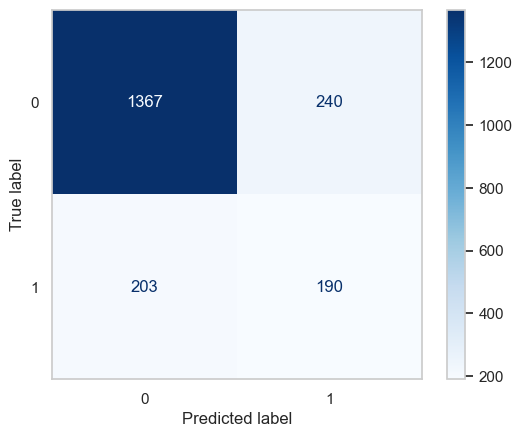

In [183]:
unique_classess= np.unique(np.concatenate([y_test,y_predit]))
cm= confusion_matrix(y_test,y_predit,labels=unique_classess)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classess)
fig,ax=plt.subplots()
disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.show()


## XGBoost

In [184]:
model2= XGBClassifier()
model2.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [185]:
y_predict2=model2.predict(X_test_preprocessing)

In [186]:
print(classification_report (y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.54      0.59       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



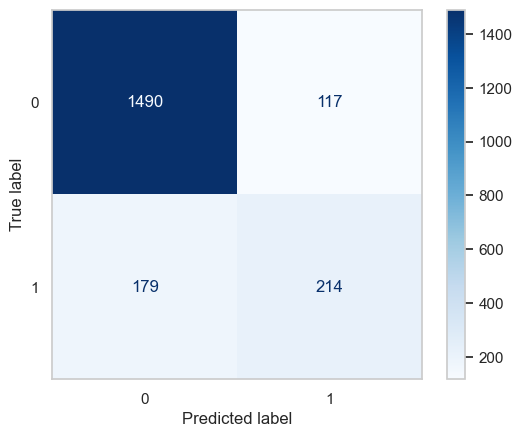

In [187]:
unique_classess= np.unique(np.concatenate([y_test,y_predict2]))
cm= confusion_matrix(y_test,y_predict2,labels=unique_classess)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classess)
fig,ax=plt.subplots()
disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.show()

## SVC

In [188]:
model3= SVC()
model3.fit(X_train_resampled,y_train_resampled) 

SVC()

In [189]:
y_predict3=model3.predict(X_test_preprocessing)

In [190]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1607
           1       0.38      0.79      0.51       393

    accuracy                           0.70      2000
   macro avg       0.66      0.74      0.65      2000
weighted avg       0.82      0.70      0.73      2000



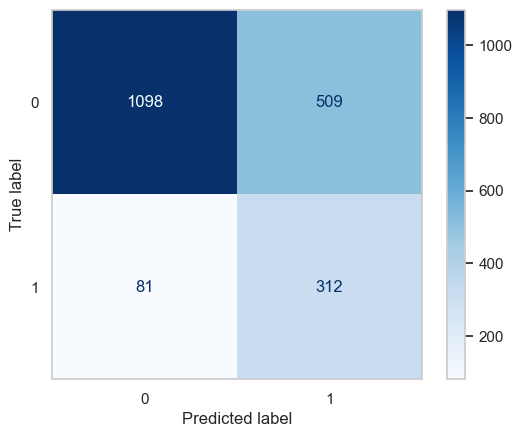

In [191]:
unique_classess= np.unique(np.concatenate([y_test,y_predict3]))
cm= confusion_matrix(y_test,y_predict3,labels=unique_classess)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classess)
fig,ax=plt.subplots()
disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.show()

## Random Forest

In [192]:
model4= RandomForestClassifier()
model4.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [193]:
y_predict4=model4.predict(X_test_preprocessing)

In [194]:
print(classification_report(y_test,y_predict4))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1607
           1       0.56      0.56      0.56       393

    accuracy                           0.83      2000
   macro avg       0.72      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



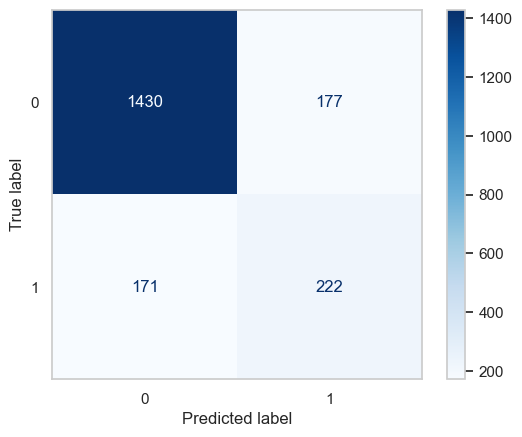

In [195]:
unique_classess= np.unique(np.concatenate([y_test,y_predict4]))
cm= confusion_matrix(y_test,y_predict4,labels=unique_classess)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classess)
fig,ax=plt.subplots()
disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.show()

## Voting Classifier

In [196]:
voting = VotingClassifier(estimators=[('df',model),('xgb',model2),('svc',model3),('rf',model4)])

In [197]:
voting.fit(X_train_resampled,y_train_resampled)

VotingClassifier(estimators=[('df',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 3})),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importa...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svc', SVC()), ('rf', RandomForestClassifier())])

In [198]:
y_predict_v=voting.predict(X_test_preprocessing)

In [199]:
print(classification_report(y_test,y_predict_v))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.54      0.59       393

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



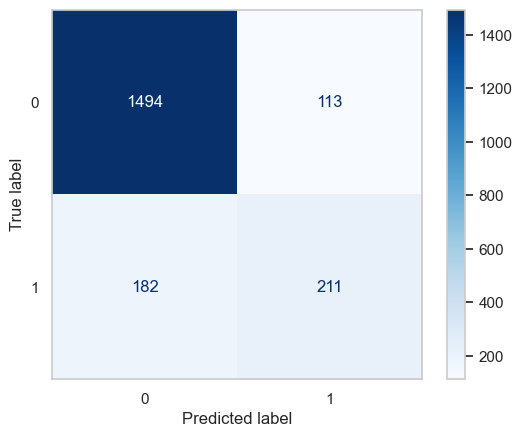

In [200]:
unique_classess= np.unique(np.concatenate([y_test,y_predict_v]))
cm= confusion_matrix(y_test,y_predict_v,labels=unique_classess)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classess)
fig,ax=plt.subplots()
disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.show()

# RFM ANALYSIS

#### Recency: Since we don't have transaction dates, we can consider Tenure as an inverse proxy for Recency. Higher tenure could indicate less recency of engagement if we assume that new customers might be more actively engaged.
#### Frequency: We can use NumOfProducts as a proxy for Frequency, assuming that customers with more products interact more frequently with the bank.
#### Monetary: We can use Balance or EstimatedSalary as a proxy for Monetary value.

## Import Libraries

In [214]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [215]:
f = pd.read_csv('C:/Users/agaly/OneDrive/Desktop/ybi foundation/Business Analytics/Churn_Modelling.csv')

In [216]:
f.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [217]:
# Calculate Recency (R) using Tenure (assuming inverse relationship)
f['Recency'] = f['Tenure'].max() - f['Tenure'] + 1  # Inverse tenure to reflect recency

# Calculate Frequency (F) using CreditScore
f['Frequency'] = f['CreditScore']

# Calculate Monetary (M) using NumOfProducts
f['Monetary'] = f['NumOfProducts']

# Display the structure of RFM DataFrame
print(f[['CustomerId', 'Recency', 'Frequency', 'Monetary']].head())


   CustomerId  Recency  Frequency  Monetary
0    15634602        9        619         1
1    15647311       10        608         1
2    15619304        3        502         3
3    15701354       10        699         2
4    15737888        9        850         1


In [227]:

# Function to calculate Recency score (R_score)
def calculate_r_score(recency):
    if recency <= f['Recency'].quantile(0.2):
        return 5
    elif recency <= f['Recency'].quantile(0.4):
        return 4
    elif recency <= f['Recency'].quantile(0.6):
        return 3
    elif recency <= f['Recency'].quantile(0.8):
        return 2
    else:
        return 1

# Function to calculate Frequency score (F_score)
def calculate_f_score(frequency):
    if frequency <= f['Frequency'].quantile(0.2):
        return 1
    elif frequency <= f['Frequency'].quantile(0.4):
        return 2
    elif frequency <= f['Frequency'].quantile(0.6):
        return 3
    elif frequency <= f['Frequency'].quantile(0.8):
        return 4
    else:
        return 5

# Function to calculate Monetary score (M_score)
def calculate_m_score(monetary):
    if monetary <= f['Monetary'].quantile(0.2):
        return 1
    elif monetary <= f['Monetary'].quantile(0.4):
        return 2
    elif monetary <= f['Monetary'].quantile(0.6):
        return 3
    elif monetary <= f['Monetary'].quantile(0.8):
        return 4
    else:
        return 5

# Apply functions to calculate scores
f['R_score'] = f['Recency'].apply(calculate_r_score)
f['F_score'] = f['Frequency'].apply(calculate_f_score)
f['M_score'] = f['Monetary'].apply(calculate_m_score)

# Display the structure of RFM DataFrame with scores
print(f[['CustomerId', 'R_score', 'F_score', 'M_score']].head())

   CustomerId  R_score  F_score  M_score
0    15634602        2        2        1
1    15647311        1        2        1
2    15619304        5        1        5
3    15701354        1        4        3
4    15737888        2        5        1


### RFM Conversion

In [228]:
# Combine R, F, and M scores into RFM Segment and calculate RFM Score
f['RFM_Segment'] = f['R_score'].astype(str) + f['F_score'].astype(str) + f['M_score'].astype(str)
f['RFM_Score'] = f[['R_score', 'F_score', 'M_score']].sum(axis=1)

# Display RFM Segment and Score
print(f[['CustomerId', 'RFM_Segment', 'RFM_Score']].head())


   CustomerId RFM_Segment  RFM_Score
0    15634602         221          5
1    15647311         121          4
2    15619304         515         11
3    15701354         143          8
4    15737888         251          8


In [229]:
# Analyze RFM segments
rfm_analysis = f.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'count'
}).rename(columns={'RFM_Score': 'Customer_Count'}).reset_index()

# Display RFM analysis
print(rfm_analysis)


   RFM_Segment    Recency   Frequency  Monetary  Customer_Count
0          111  10.273810  511.160714  1.000000             168
1          113  10.245614  518.561404  2.000000             114
2          115  10.200000  512.500000  3.000000              10
3          121  10.315476  595.785714  1.000000             168
4          123  10.304000  598.720000  2.000000             125
..         ...        ...         ...       ...             ...
70         543   2.204082  704.946939  2.000000             245
71         545   2.250000  699.250000  3.000000              12
72         551   2.155039  788.554264  1.000000             258
73         553   2.240175  784.938865  2.000000             229
74         555   2.000000  778.800000  3.266667              15

[75 rows x 5 columns]


### Based on Recency & Frequency Score

1. can't loose them → A class of customers who used to shop very frequently but have not shopped for a long time and should not be lost.
2. at risk → A class of customers who shop relatively frequently but have not shopped for a long time.
3. hibernating → Customers who are literally asleep, both shopped infrequently and have not shopped for a long time.
4. about to sleep → A class of customers who do not shop frequently and have not shopped for some time; they are heading towards sleep.
5. need attention → This is the class of customers in the middle of the RF graph (33%), moving towards the risky group if not addressed.
6. new customers → A class of customers who have not shopped frequently (maybe once) and have been shopping for a short period of time, they are considered as new customers.
7. promising → New customers are the aged version of new customers :) they are customers who have not shopped frequently and have shopped for a short period of time.
8. potential loyalists → Customers who shop moderately often and it has not been long since their last purchase.
9. loyal customers → Customers who shop very often and it has been a short time since their last purchase.
10. champions → They are our champions, our crown jewels! Customers who shop very often and have made their last purchase within a very short period of time.

In [238]:

# Function to classify RFM segment
def classify_segment(r_score, f_score, m_score):
    if r_score >= 4 and f_score >= 4 and m_score >= 4:
        return 'Champions'  # Very high frequency, very recent, high monetary
    elif r_score <= 2 and f_score >= 3 and m_score >= 3:
        return 'At risk'  # Used to shop frequently, not recently
    elif r_score <= 2 and f_score <= 2:
        return 'Hibernating'  # Infrequent and not recently active
    elif r_score <= 2 and f_score >= 3:
        return 'About to sleep'  # Infrequent but recently active
    elif r_score >= 3 and f_score <= 2 and m_score <= 2:
        return 'Need attention'  # Moderate frequency but not recently active
    elif r_score >= 4 and f_score <= 2 and m_score <= 2:
        return 'Potential loyalists'  # Moderate frequency, recent
    elif r_score >= 3 and f_score >= 3 and m_score >= 3:
        return 'Loyal customers'  # High frequency, recent
    elif r_score <= 3 and f_score <= 3 and m_score <= 3:
        return 'New customers'  # New and infrequent
    elif r_score <= 3 and f_score <= 3 and m_score >= 3:
        return 'Promising'  # New but recently active
    else:
        return 'Uncategorized'

# Apply function to classify each customer
f['RFM_segment'] = f.apply(lambda x: classify_segment(x['R_score'], x['F_score'], x['M_score']), axis=1)

# Count customers in each segment
segment_counts = f['RFM_segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_segment', 'Customer_Count']


# Display the structure of RFM DataFrame with segments and counts
print(f[['CustomerId', 'R_score', 'F_score', 'M_score', 'RFM_segment']].head())



   CustomerId  R_score  F_score  M_score     RFM_segment
0    15634602        2        2        1     Hibernating
1    15647311        1        2        1     Hibernating
2    15619304        5        1        5   Uncategorized
3    15701354        1        4        3         At risk
4    15737888        2        5        1  About to sleep


In [240]:
print("\nCustomer counts per segment:\n")
print(segment_counts)


Customer counts per segment:

       RFM_segment  Customer_Count
0    Uncategorized            2656
1  Loyal customers            1854
2      Hibernating            1397
3   Need attention            1322
4   About to sleep            1055
5          At risk            1053
6    New customers             578
7        Champions              52
8        Promising              33


In [242]:

# Group by RFM_segment and calculate mean, count, and max for Recency, Frequency, Monetary
rfm_summary = f.groupby('RFM_segment').agg({
    'Recency': ['mean', 'count', 'max'],
    'Frequency': ['mean', 'count', 'max'],
    'Monetary': ['mean', 'count', 'max']
}).round()

# Display the summarized RFM metrics
print(rfm_summary)

                Recency           Frequency            Monetary          
                   mean count max      mean count  max     mean count max
RFM_segment                                                              
About to sleep      9.0  1055  11     714.0  1055  850      1.0  1055   1
At risk             9.0  1053  11     715.0  1053  850      2.0  1053   4
Champions           3.0    52   5     742.0    52  850      3.0    52   4
Hibernating         9.0  1397  11     555.0  1397  627      1.0  1397   4
Loyal customers     4.0  1854   7     714.0  1854  850      2.0  1854   4
Need attention      4.0  1322   7     555.0  1322  627      1.0  1322   1
New customers       6.0   578   7     591.0   578  678      2.0   578   2
Promising           6.0    33   7     568.0    33  624      3.0    33   4
Uncategorized       4.0  2656   7     665.0  2656  850      1.0  2656   4


In [244]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [245]:
import matplotlib.pyplot as plt
import squarify

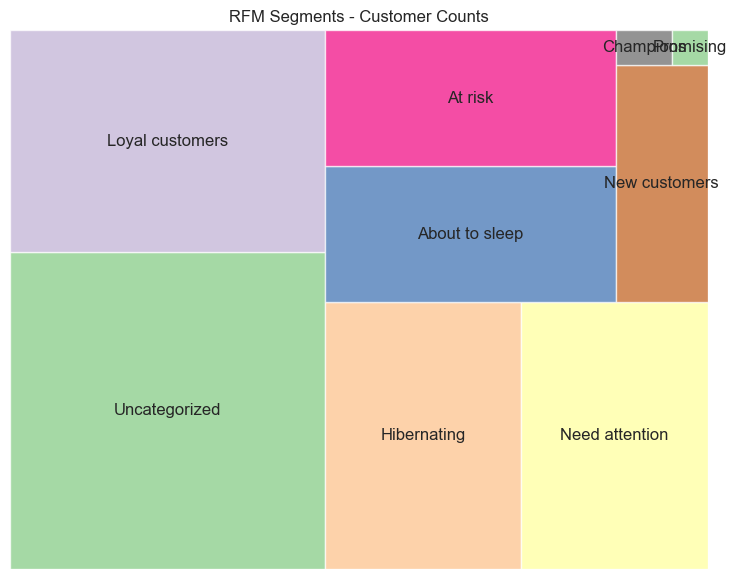

In [248]:
f_segment_counts = pd.DataFrame(segment_counts)

# Sort segments by customer count (optional, for better visualization)
f_segment_counts = f_segment_counts.sort_values(by='Customer_Count', ascending=False)

# Plotting the tree map
plt.figure(figsize=(9, 7))
squarify.plot(sizes=f_segment_counts['Customer_Count'], label=f_segment_counts['RFM_segment'], color=plt.cm.Accent.colors, alpha=0.7)
plt.axis('off')
plt.title('RFM Segments - Customer Counts')
plt.show()


In [250]:
f.to_csv('C:/Users/agaly/OneDrive/Desktop/ybi foundation/Business Analytics/Churn_Analysis.csv', index=False)